# Light_GBM Model

In [72]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [73]:
data = pd.read_csv('sales_processed')

data['date'] = pd.to_datetime(data['date']) # Convertir en datetime
data = data.sort_values(by='date') # Trier par date
X = data.drop(columns=["date", "item_cnt_day"])
y = data["item_cnt_day"]

In [74]:

data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,revenue
28730,2013-01-01,0,27,2620,0.063406,1.0,1,1,2013,-0.029076
92756,2013-01-01,0,42,13573,-0.284288,1.0,1,1,2013,-0.134680
54139,2013-01-01,0,8,18144,-0.399692,1.0,1,1,2013,-0.169731
100206,2013-01-01,0,51,17895,-0.388114,1.0,1,1,2013,-0.166214
114381,2013-01-01,0,46,5177,-0.168143,2.0,1,1,2013,0.005912
...,...,...,...,...,...,...,...,...,...,...
2889993,2015-10-31,33,55,5979,-0.283917,1.0,31,10,2015,-0.134567
2924705,2015-10-31,33,21,4177,-0.341805,1.0,31,10,2015,-0.152149
2892131,2015-10-31,33,58,21314,-0.283917,1.0,31,10,2015,-0.134567
2906487,2015-10-31,33,19,7704,0.237067,1.0,31,10,2015,0.023670


In [75]:
 # Diviser en ensemble d'entraînement et de test (80% train, 20% test)
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [76]:
X_train

,date_block_num,shop_id,item_id,item_price,day,month,year,revenue
28730,0,27,2620,0.063406,1,1,2013,-0.029076
92756,0,42,13573,-0.284288,1,1,2013,-0.134680
54139,0,8,18144,-0.399692,1,1,2013,-0.169731
100206,0,51,17895,-0.388114,1,1,2013,-0.166214
114381,0,46,5177,-0.168143,1,1,2013,0.005912
...,...,...,...,...,...,...,...,...
2367449,24,28,18396,-0.399692,6,1,2015,-0.169731
2354123,24,40,11918,0.584390,6,1,2015,0.129161
2367461,24,28,18684,-0.283917,6,1,2015,-0.134567
2354116,24,40,13400,0.034462,6,1,2015,-0.037867


In [77]:
X_test

,date_block_num,shop_id,item_id,item_price,day,month,year,revenue
2402709,24,53,17015,-0.226030,6,1,2015,-0.116985
2331791,24,10,16550,-0.468577,6,1,2015,-0.190653
2402704,24,53,17416,-0.110256,6,1,2015,0.041076
2367504,24,28,17995,-0.458158,6,1,2015,-0.187488
2402690,24,53,17075,-0.110256,6,1,2015,-0.081821
...,...,...,...,...,...,...,...,...
2889993,33,55,5979,-0.283917,31,10,2015,-0.134567
2924705,33,21,4177,-0.341805,31,10,2015,-0.152149
2892131,33,58,21314,-0.283917,31,10,2015,-0.134567
2906487,33,19,7704,0.237067,31,10,2015,0.023670


Model Light gbm sans cross validation:

In [78]:
# Convertir y_train et y_test en entiers
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

# Configuration de LightGBM
params = {
    'objective': 'regression',  # Pour la régression
    'boosting_type': 'gbdt',
    'metric': 'rmse',  # Métrique utilisée pour l'entraînement
    'n_estimators': 200,  # Nombre d'arbres
    'learning_rate': 0.1,  # Taux d'apprentissage
    'max_depth': 5,  # Profondeur maximale des arbres
    'random_state': 42,  # Assurer la reproductibilité
    'verbose': -1
}

# Initialiser le modèle LightGBM
lgb_model = lgb.LGBMRegressor(**params)

# Entraîner le modèle sur les données d'entraînement
lgb_model.fit(X_train, y_train_int)

# Prédire sur le jeu de test
y_pred_test = lgb_model.predict(X_test)


# Calcule des erreurs:
def smape(y_true, y_pred):
    """Symmetric Mean Absolute Percentage Error"""
    return np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)) * 100)

def mpe(y_true, y_pred):
    """Mean Percentage Error"""
    return np.mean((y_true - y_pred) / y_true) * 100 if np.all(y_true != 0) else np.nan

def ame(y_true, y_pred):
    """Absolute Mean Error"""
    return np.mean(np.abs(y_true - y_pred))

def mape(y_true, y_pred):
    """Mean Absolute Percentage Error"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if np.all(y_true != 0) else np.nan

smape_value = smape(y_test, y_pred_test)
mpe_value = mpe(y_test, y_pred_test)
mape_score = mape(y_test, y_pred_test)
ame_score = ame(y_test, y_pred_test)
# Afficher les résultats
print(f"SMAPE : {smape_value:.2f}%")
print(f"MPE : {mpe_value:.2f}%")
print(f"MAPE : {mape_score:.2f}%")
print(f"MAE : {ame_score:.2f}%")

SMAPE : 0.64%
MPE : -0.02%
MAPE : 0.63%
MAE : 0.05%


**Interprétation des scores:**

Un **SMAPE** de 0.64% veut dire que, en moyenne, notre modèle a des prédictions qui sont très proches des valeurs réelles, avec seulement 0.64% d'erreur. C’est un excellent résultat, car en général, un SMAPE inférieur à 1% est considéré comme très précis.

**MPE** montre s’il y a une tendance à sous-estimer ou surestimer les valeurs. Ici, un MPE de -0.02% nous dit que, globalement, notre modèle sous-estime légèrement les valeurs réelles, mais cette erreur est très petite.

Un **MAPE** de 0.63% signifie que l'erreur moyenne absolue de notre modèle est de seulement 0.63% par rapport aux valeurs réelles. Cela montre que les prédictions du modèle sont très précises et que l'erreur en pourcentage est très faible.

Un **MAE **de 0.05 est une erreur très faible, ce qui confirme que le modèle est très précis dans ses prédictions.

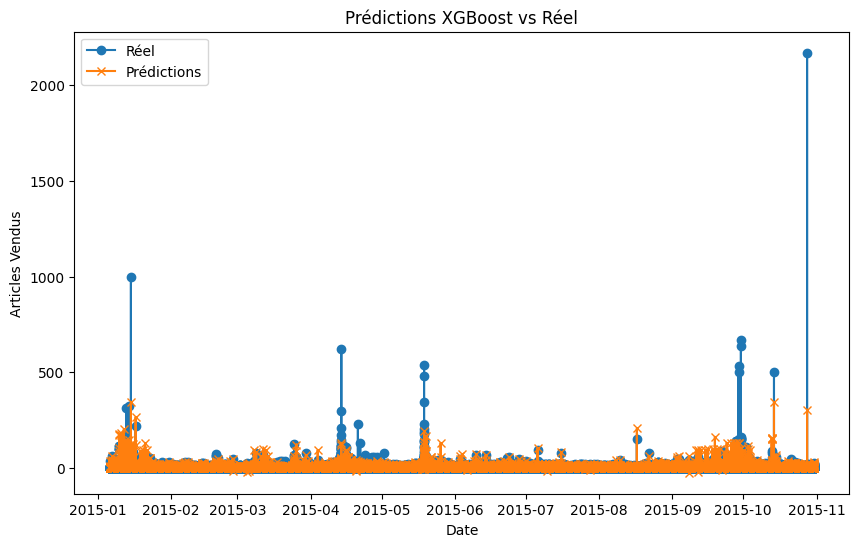

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['date'][train_size:], y_test, label="Réel", marker='o')
plt.plot(data['date'][train_size:], y_pred_test, label="Prédictions", marker='x')
plt.xlabel("Date")
plt.ylabel("Articles Vendus")
plt.legend()
plt.title("Prédictions vs Réel")
plt.show()

In [61]:
# Sauvegarder le modèle en tant que Booster
lgb_model.booster_.save_model('lgb_model.txt')

**Visualisation des valeurs des prédictions et des valeurs réelles par tranche de temps pour une meilleur comparaison**

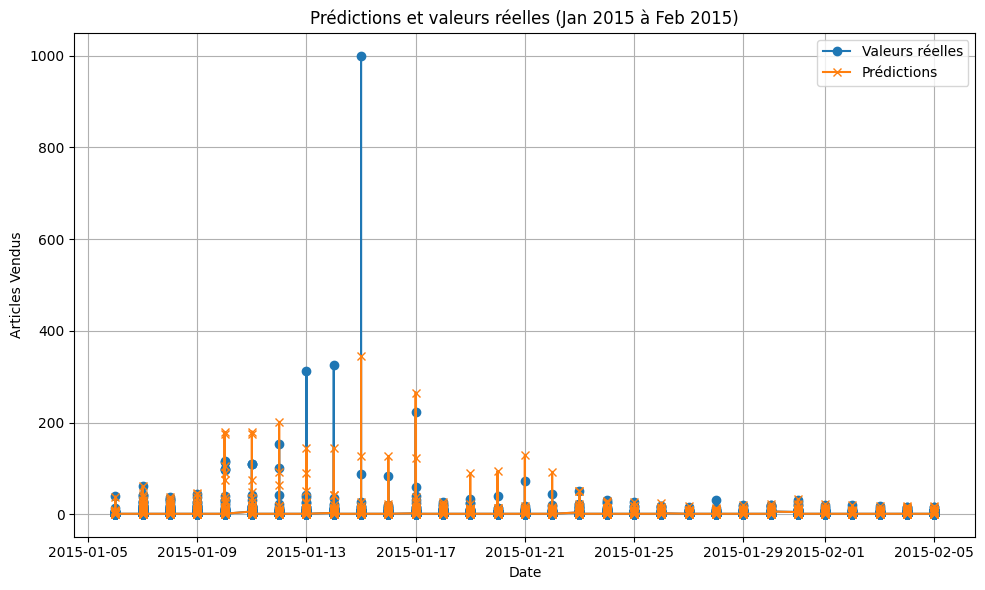

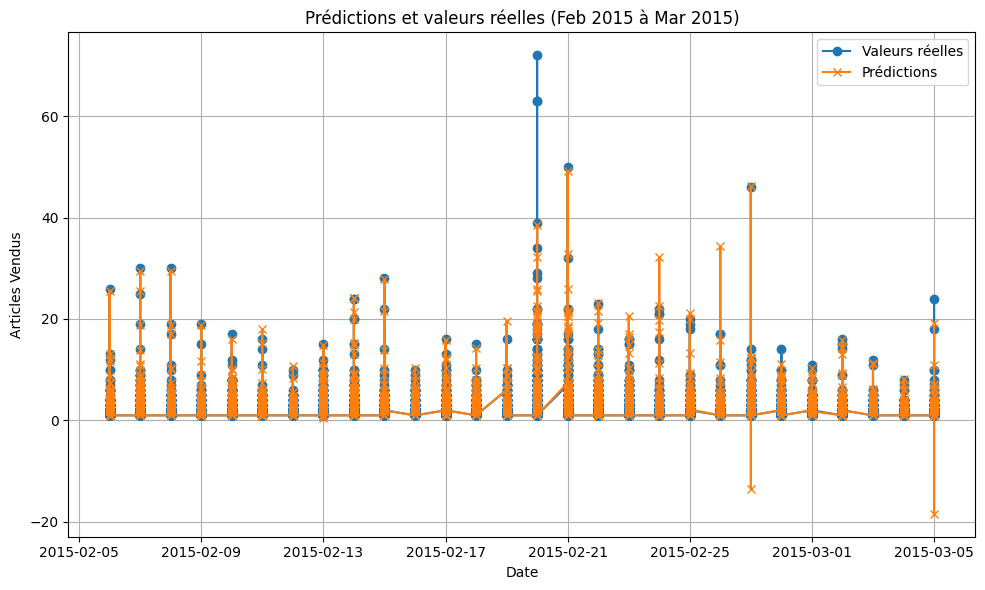

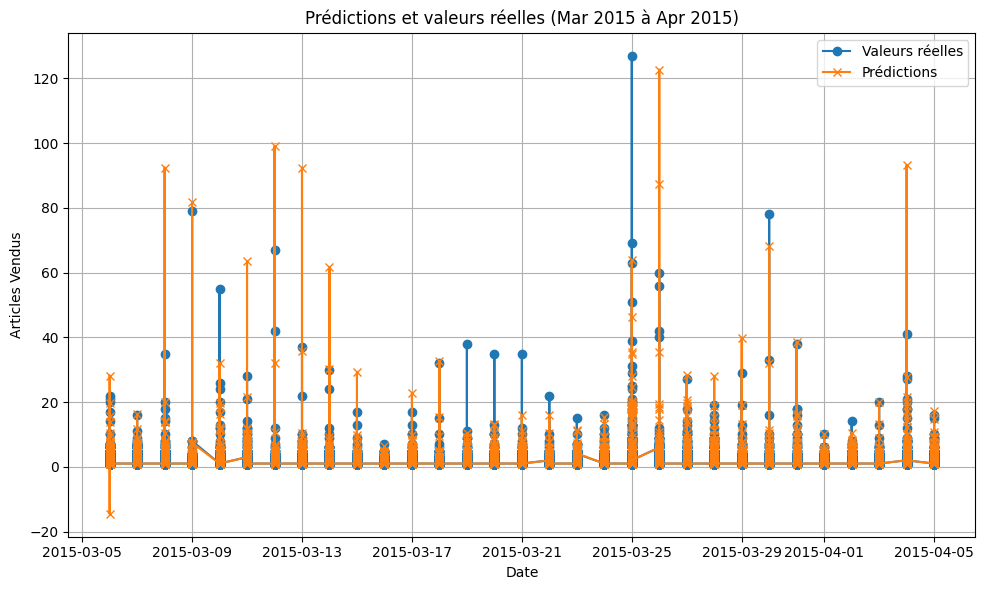

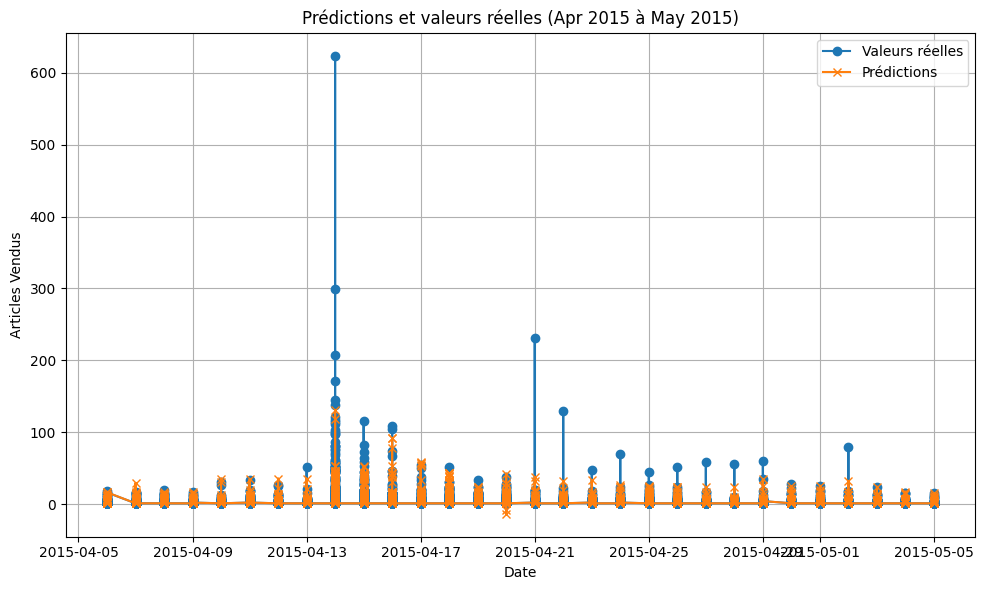

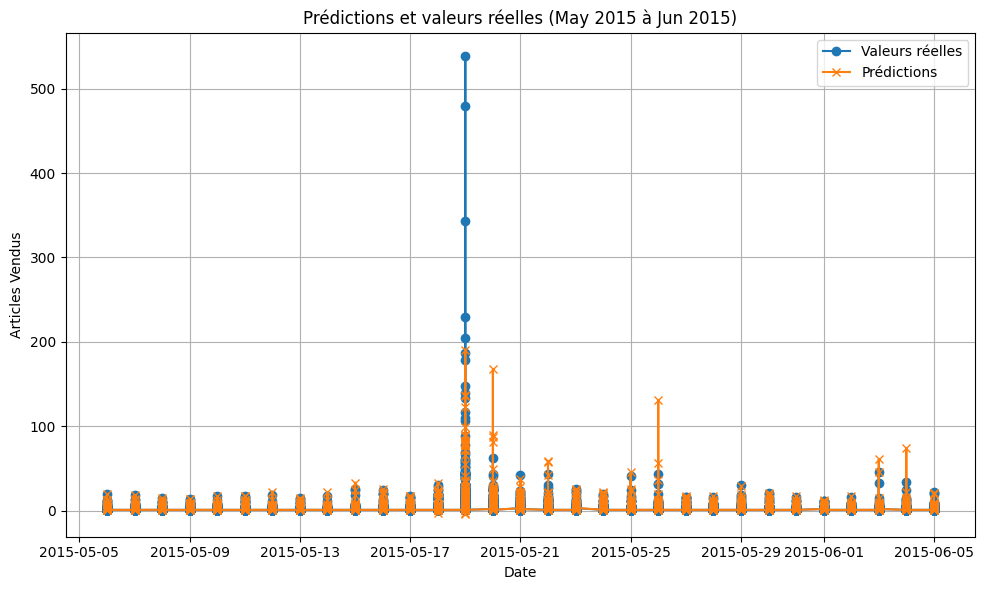

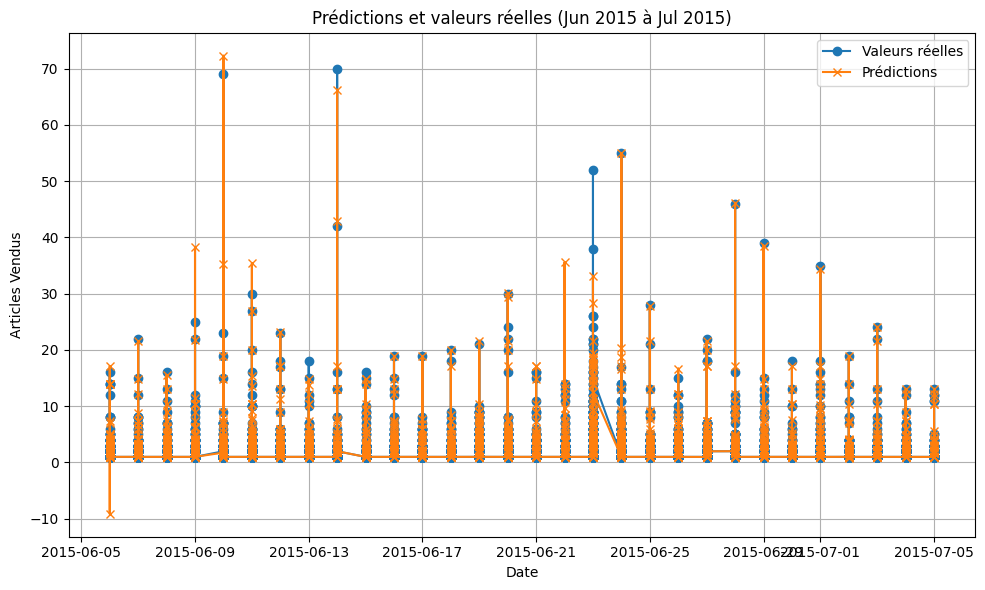

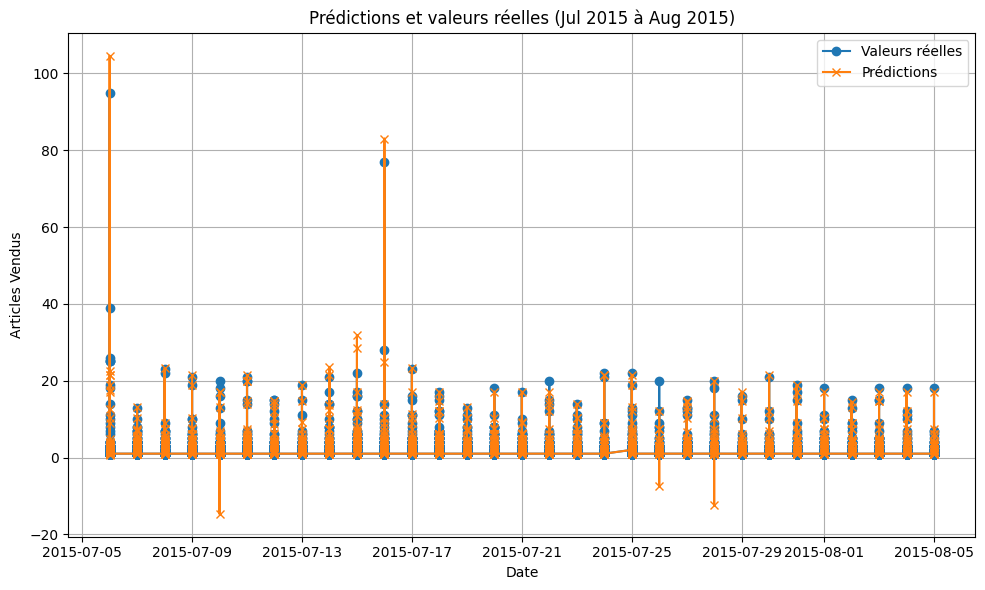

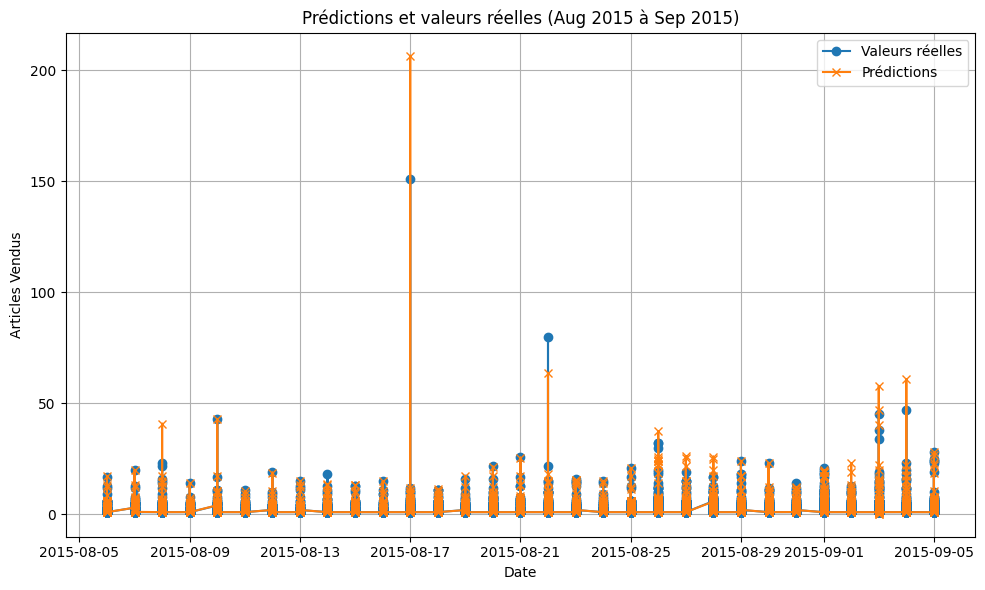

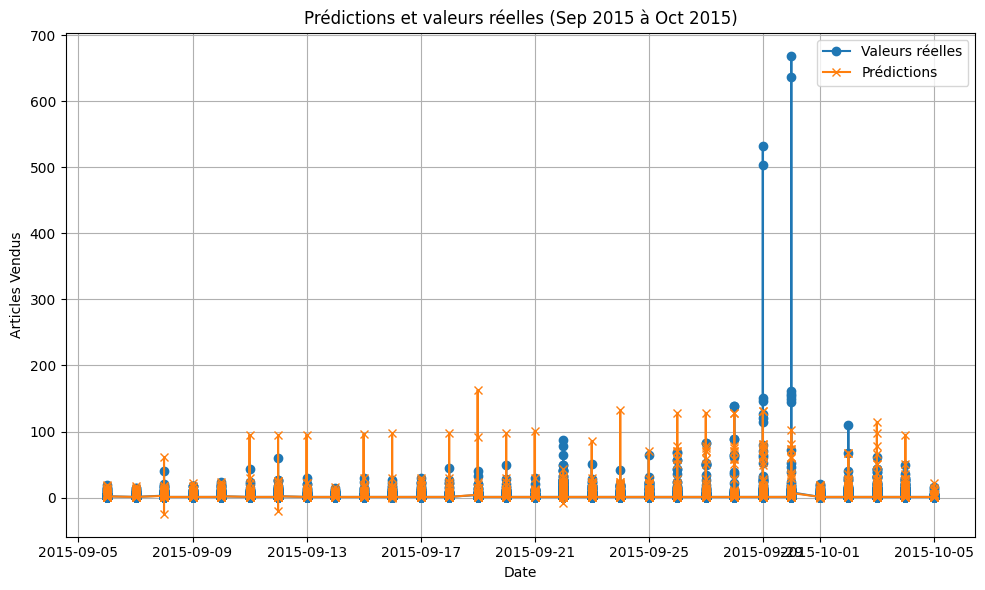

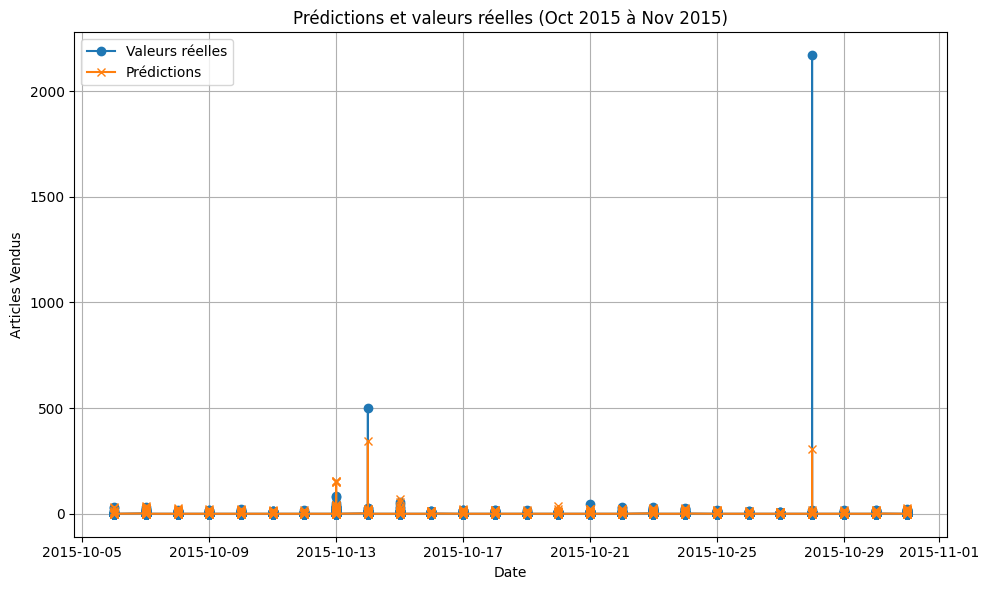

In [62]:
# Convertir y_test et y_pred en pandas.Series avec les dates comme index
dates_test = data['date'][train_size:]
y_test = pd.Series(y_test.values, index=dates_test)
y_pred = pd.Series(y_pred_test, index=dates_test)

# Choisir k mois pour la visualisation
k = 1  # Exemple : Afficher les données par tranches de 1 mois

# Grouper les données par tranche de k mois
start_date = dates_test.min()
end_date = dates_test.max()

# Tracer les prédictions et les valeurs réelles par tranche de k mois
current_date = start_date
while current_date < end_date:
    next_date = current_date + pd.DateOffset(months=k)

    # Filtrer les données pour cette période
    y_test_chunk = y_test[(y_test.index >= current_date) & (y_test.index < next_date)]
    y_pred_chunk = y_pred[(y_pred.index >= current_date) & (y_pred.index < next_date)]

    # Créer le graphique
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_chunk.index, y_test_chunk.values, label="Valeurs réelles", marker="o")
    plt.plot(y_pred_chunk.index, y_pred_chunk.values, label="Prédictions", marker="x")
    plt.title(f"Prédictions et valeurs réelles ({current_date.strftime('%b %Y')} à {next_date.strftime('%b %Y')})")
    plt.xlabel("Date")
    plt.ylabel("Articles Vendus")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


    current_date = next_date

**Analyse des graphiques:**

**Premier graphique (Janvier 2015 - Février 2015) :**

**Observations positives :** Le modèle suit bien la tendance générale des ventes, avec des prédictions proches des valeurs réelles en dehors des événements exceptionnels.

**Problèmes :** Il y a un grand pic de ventes autour du 12 janvier 2015 que le modèle ne capture pas. Cela pourrait être dû à un événement spécifique (comme une promotion), que le modèle ne prend pas en compte.

2. **Deuxième graphique (Février 2015 - Mars 2015)** :

**Observations positives :** Les prédictions suivent la tendance générale des ventes sur une période prolongée. Le modèle semble capable de prédire les fluctuations régulières des ventes.

**Problèmes :** Certaines erreurs apparaissent, notamment autour du 21 février, où le modèle sous-estime les vents exceptionnels. Cependant, cette erreur reste modérée, et les prédictions restent globalement proches des valeurs réelles.

**3. Troisième graphique (Mars 2015 - Avril 2015) :**

**Observations positives :** Le modèle capte bien les tendances générales et suit les fluctuations saisonnières des ventes. Les prédictions sont relativement proches des valeurs réelles dans la majorité des cas.

**Problèmes :** Le modèle sous-estime les pics exceptionnels, notamment autour du 25 mars, où une vente anormalement élevée n'est pas capturée. Ce type d'erreur peut être lié à un manque de données externes (promotions, événements spéciaux).

**4. Quatrième graphique (Avril 2015 - Mai 2015) :**

**Observations positives :** Le modèle suit bien la tendance générale des ventes, en particulier pendant les périodes sans changements brusques.

**Problèmes :** Une forte sous-estimation des ventes autour du 15 avril 2015 est visible. Ce pourrait être une situation où un événement particulier a provoqué un pic de vente, mais le modèle n'a pas pu le prévoir. Cela montre une limite dans la capacité du modèle à anticiper des événements exceptionnels.

**5. Cinquième graphique (Mai 2015 - Juin 2015) :**

**Observations positives :** Le modèle capture bien la tendance générale et reflète les fluctuations saisonnières, comme la stabilité des ventes avant les pics.

**Problèmes :** Une sous-estimation importante des ventes est observée autour du 17 mai 2015, probablement due à un événement ou un pic de demande que le modèle n’a pas pu prévoir. Cela met en évidence une faiblesse dans la gestion des événements exceptionnels.

**6. Sixième graphique (Juin 2015 - Juillet 2015) :**

**Observations positives :** Le modèle suit bien la tendance globale et prédit la direction générale des ventes, avec des prédictions relativement proches des valeurs réelles.

**Problèmes :** Il y a une légère sous-estimation de certains pics, mais la performance reste correcte. Le modèle semble moins sensible aux fluctuations importantes, ce qui pourrait être amélioré.

**7. Septième graphique (Juillet 2015 - Août 2015) :**

**Observations positives :** Le modèle capte les fluctuations régulières et suit bien les tendances des ventes. Les erreurs restent petites dans la majorité des périodes.

**Problèmes :** Des pics exceptionnels, comme celui du 9 juillet, sont mal capturés, avec des prédictions beaucoup plus faibles que les valeurs réelles. Cela peut indiquer un manque de prise en compte de certains facteurs influençant les ventes pendant ces périodes.

**8. Huitième graphique (Août 2015 - Septembre 2015) :**

**Observations positives :** Les prédictions suivent bien les tendances générales, ce qui montre que le modèle est capable de capter les tendances à long terme.

**Problèmes :** Les pics isolés (par exemple, autour du 21 août) sont mal capturés, suggérant une sous-estimation de ces périodes spécifiques. Le modèle pourrait être amélioré pour mieux anticiper ces événements.

**9. Neuvième graphique (Septembre 2015 - Octobre 2015) :**

**Observations positives :** Le modèle suit bien la tendance globale et parvient à prédire les fluctuations de manière raisonnable dans les périodes où les ventes sont plus stables.

**Problèmes :** Il y a encore un grand écart dans les prédictions autour du 25 septembre, où les pics sont sous-estimés. Cela montre une nouvelle difficulté à capturer les événements exceptionnels.

**Visualisation du nombre d'articles vendus par mois:**

<ipython-input-80-cdf38386a2b3>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_test_monthly = y_test.resample('M').sum()  # Somme des ventes réelles par mois
<ipython-input-80-cdf38386a2b3>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_pred_monthly = y_pred.resample('M').sum()  # Somme des ventes prédites par mois


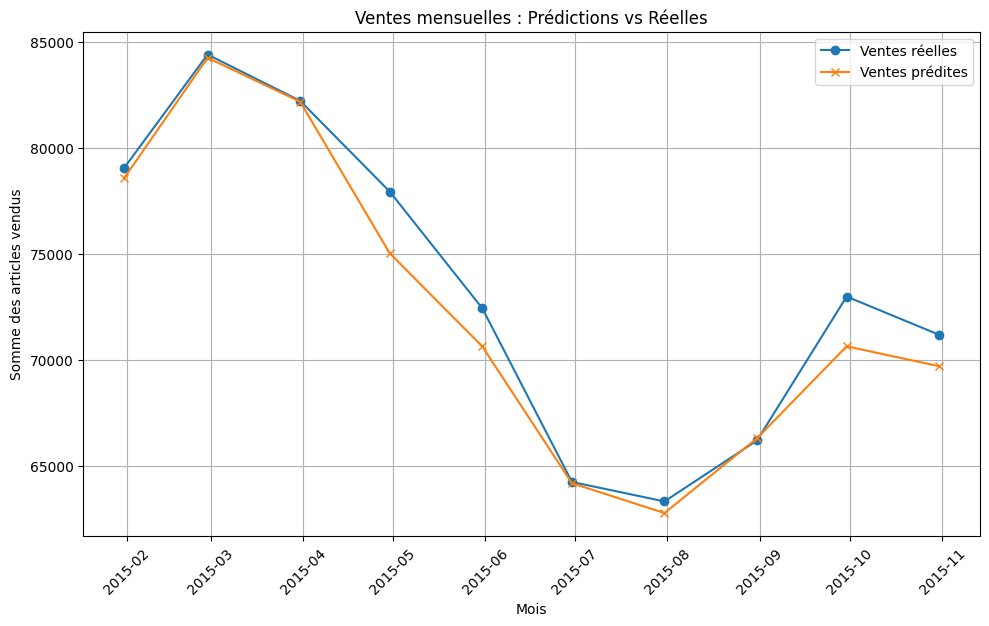

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir y_test et y_pred en pandas.Series avec les dates comme index
dates_test = data['date'][train_size:]  # Vous avez déjà cette variable avec vos données
y_test = pd.Series(y_test.values, index=dates_test)
y_pred = pd.Series(y_pred_test, index=dates_test)

# Extraire le mois de la date
y_test_monthly = y_test.resample('M').sum()  # Somme des ventes réelles par mois
y_pred_monthly = y_pred.resample('M').sum()  # Somme des ventes prédites par mois

# Visualiser la somme des ventes mensuelles
plt.figure(figsize=(10, 6))
plt.plot(y_test_monthly.index, y_test_monthly.values, label="Ventes réelles", marker="o")
plt.plot(y_pred_monthly.index, y_pred_monthly.values, label="Ventes prédites", marker="x")
plt.title("Ventes mensuelles : Prédictions vs Réelles")
plt.xlabel("Mois")
plt.ylabel("Somme des articles vendus")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Optionnel : rotation des dates pour une meilleure lisibilité
plt.show()


**Variation des ventes :** Les ventes réelles suivent une tendance assez claire, avec des pics en février et septembre 2015. En revanche, les ventes prédites suivent une tendance similaire mais avec une légère différence dans les pics et les creux.

**En février :** Il y a un pic important pour les deux séries de données, avec une légère surévaluation dans les prévisions. La différence n'est pas très significative, mais elle est présente.

**De mars à mai :** Les ventes réelles montrent une baisse progressive, et les prévisions suivent bien cette tendance. Cependant, les prévisions sont légèrement moins précises, notamment en avril, où les ventes prédites ne suivent pas parfaitement la baisse des ventes réelles.
**De juin à août :** On observe une baisse importante dans les deux courbes, mais les prévisions sont nettement moins exactes, montrant une baisse plus graduelle par rapport aux données réelles.

**Septembre :** Un grand pic dans les ventes réelles est bien capturé par les prévisions, mais les prévisions sous-estiment légèrement l'ampleur du pic.

**Octobre et novembre :** Les prévisions semblent être plus proches des ventes réelles, mais en novembre, il y a une légère divergence, les ventes réelles augmentant plus rapidement que les prévisions.

**Cross Validation en utilisant TimeSeriesSplit:**

In [63]:
from sklearn.model_selection import TimeSeriesSplit

In [64]:
tscv = TimeSeriesSplit(n_splits=5)

# Initialize variables to store results
rmse_scores = []
ame_scores = []
mpe_scores = []
smape_scores = []
mape_scores= []

In [65]:
params = {
    'objective': 'regression',  # Pour la régression
    'boosting_type': 'gbdt',
    'metric': 'rmse',  # Métrique utilisée pour l'entraînement
    'n_estimators': 200,  # Nombre d'arbres
    'learning_rate': 0.1,  # Taux d'apprentissage
    'max_depth': 5,  # Profondeur maximale des arbres
    'random_state': 42,  # Assurer la reproductibilité
    'verbose': -1
}

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[190]	valid_0's rmse: 1.2301


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


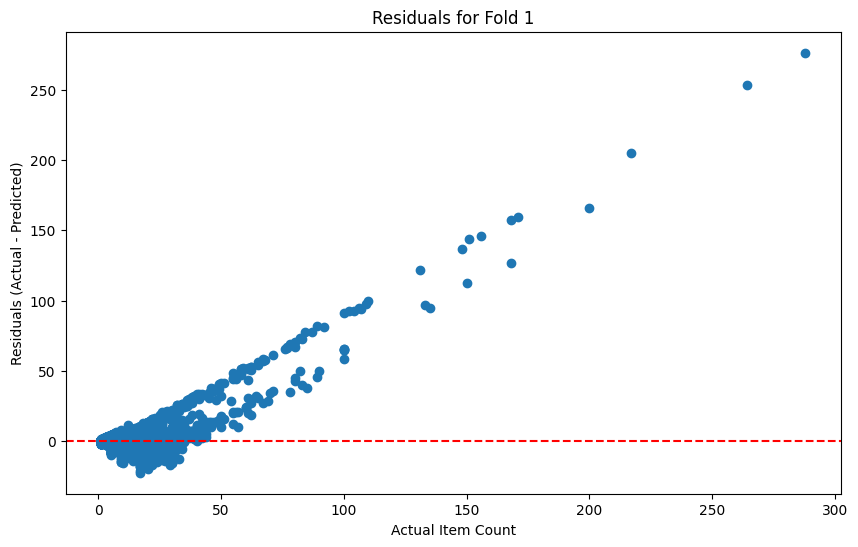

Fold 1 RMSE: 1.2301026921150575, AME: 0.047676681674965596, MPE: -0.06771694189177191, SMAPE: 0.9304371185000432


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's rmse: 0.756415


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


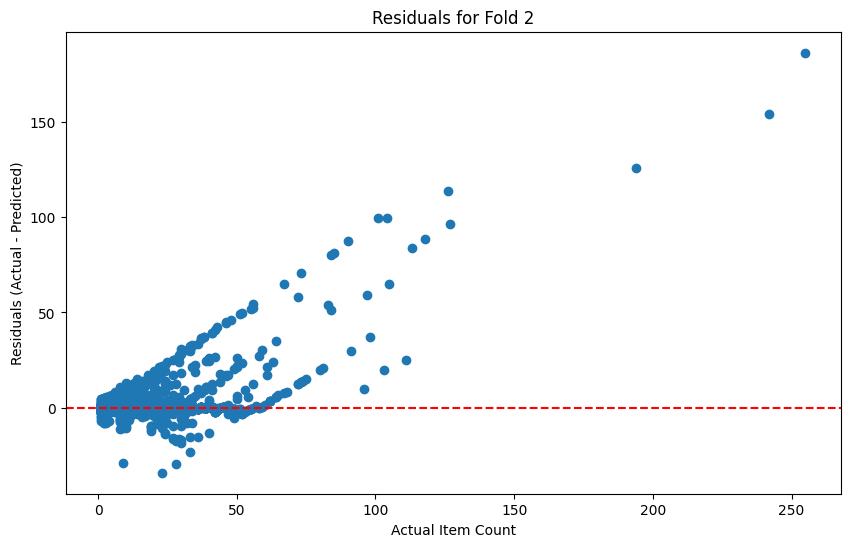

Fold 2 RMSE: 0.7564150639229802, AME: 0.03222110050230778, MPE: 0.00910872596043893, SMAPE: 0.914295324002505


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[162]	valid_0's rmse: 1.31438


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


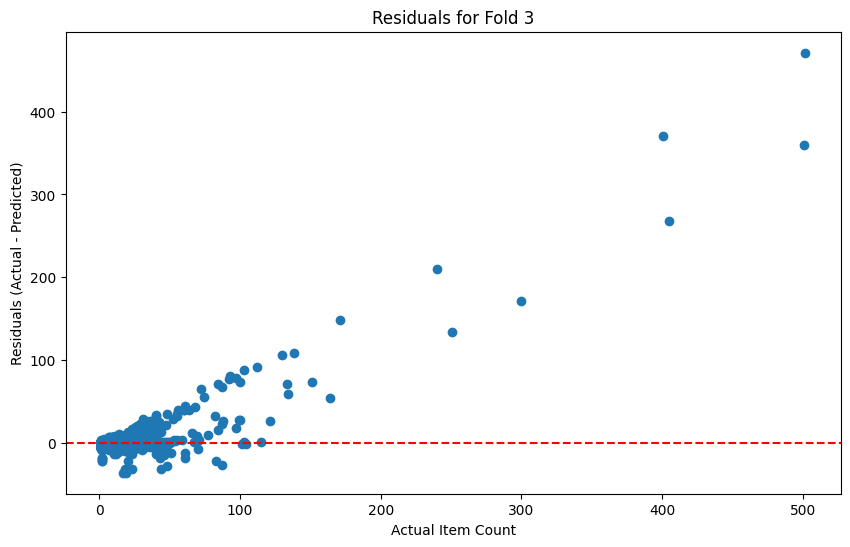

Fold 3 RMSE: 1.3143799076373492, AME: 0.03268653640215825, MPE: -0.49383921302927963, SMAPE: 0.9415604583821474


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[71]	valid_0's rmse: 1.9731


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


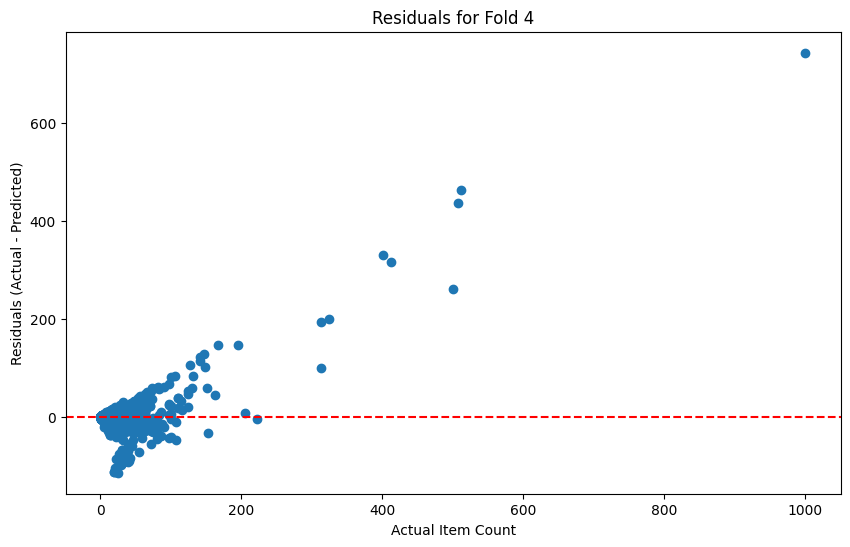

Fold 4 RMSE: 1.9730989097820082, AME: 0.06754818307823558, MPE: -0.8858556789532621, SMAPE: 1.6763814976225064


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[195]	valid_0's rmse: 3.46915


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


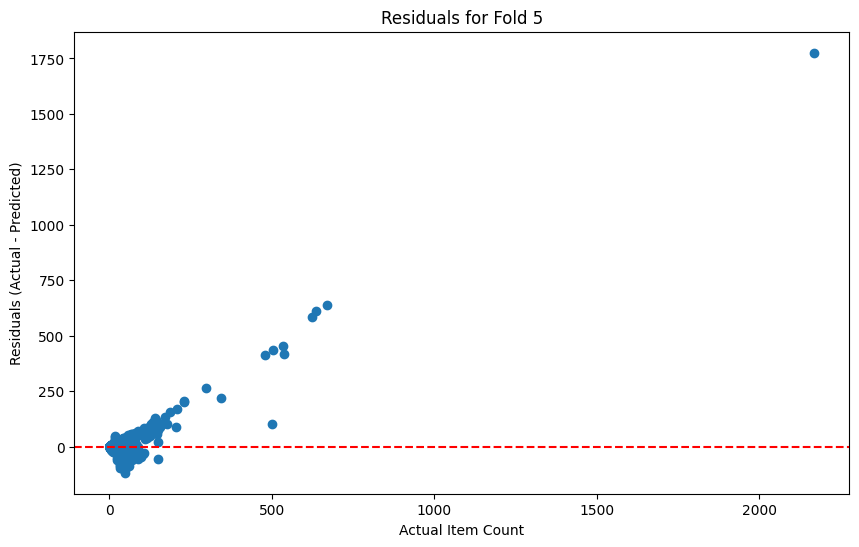

Fold 5 RMSE: 3.4691507508515964, AME: 0.05744302464435832, MPE: -0.09306798071117366, SMAPE: 0.6850264308336989
Average RMSE: 1.7486294648617982
Average AME: 0.0475151052604051
Average MPE: -0.3062742177250096
Average SMAPE: 1.0295401658681802
Average MAPE: 1.0789245004666017


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


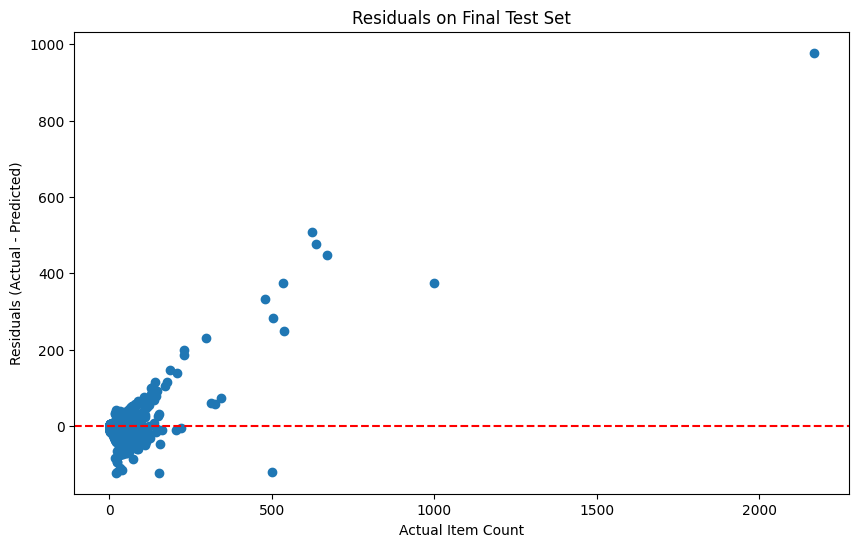

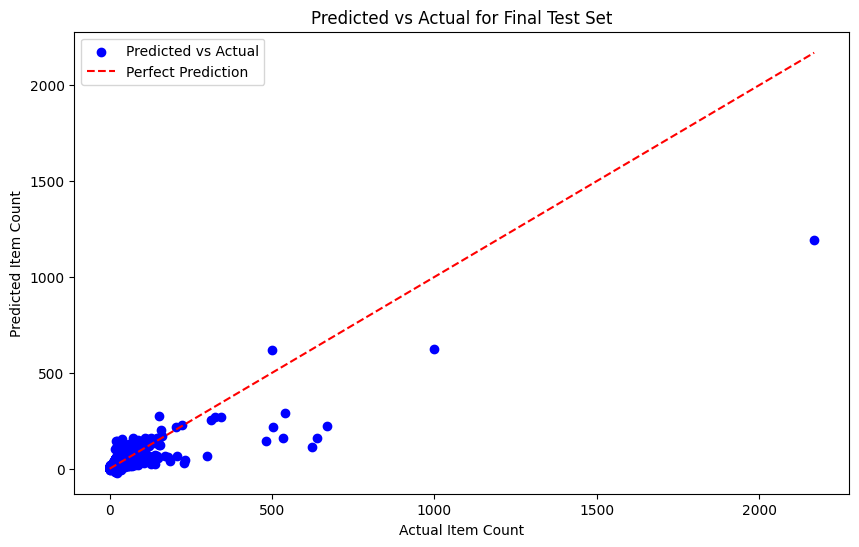

In [66]:
# Perform TimeSeriesSplit cross-validation
for fold, (train_index, test_index) in enumerate(tscv.split(X), 1):
    # Split the data into training and testing sets
    X_train, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Create LightGBM dataset
    train_set = lgb.Dataset(X_train, label=y_train)
    test_set = lgb.Dataset(X_test_fold, label=y_test_fold, reference=train_set)

    # Define LightGBM parameters
    early_stopping = lgb.callback.early_stopping(stopping_rounds=50)

    # Train the model
    model = lgb.train(
        params,
        train_set,
        num_boost_round=params['n_estimators'],
        valid_sets=[test_set],
        callbacks=[early_stopping]
    )
    # Predict on the test fold
    y_pred_fold = model.predict(X_test_fold, num_iteration=model.best_iteration)

    # Calculate residuals
    residuals_fold = y_test_fold - y_pred_fold

    # Calculate and store metrics
    rmse = mean_squared_error(y_test_fold, y_pred_fold, squared=False)
    ame_score = ame(y_test_fold, y_pred_fold)
    mpe_score = mpe(y_test_fold, y_pred_fold)
    smape_score = smape(y_test_fold, y_pred_fold)
    mape_score = mape(y_test_fold, y_pred_fold)

    rmse_scores.append(rmse)
    ame_scores.append(ame_score)
    mpe_scores.append(mpe_score)
    smape_scores.append(smape_score)
    mape_scores.append(mape_score)

    # Plot Residuals for each fold
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_fold, residuals_fold)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals for Fold {fold}')
    plt.xlabel('Actual Item Count')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.show()


    print(f"Fold {fold} RMSE: {rmse}, AME: {ame_score}, MPE: {mpe_score}, SMAPE: {smape_score}")

# Average scores over all folds
average_rmse = np.mean(rmse_scores)
average_ame = np.mean(ame_scores)
average_mpe = np.mean(mpe_scores)
average_smape = np.mean(smape_scores)
average_mape = np.mean(mape_scores)

print(f"Average RMSE: {average_rmse}")
print(f"Average AME: {average_ame}")
print(f"Average MPE: {average_mpe}")
print(f"Average SMAPE: {average_smape}")
print(f"Average MAPE: {average_mape}")

# Final Model on Full Training Set and Evaluation on X_test (Final Test Set)
# Train the final model on all training data
train_set_final = lgb.Dataset(X, label=y)
final_model = lgb.train(params, train_set_final, num_boost_round=1000)

# Predict on the test set (this is the final test set you were keeping separate)
y_test_final_pred = final_model.predict(X_test, num_iteration=final_model.best_iteration)

# Calculate residuals on the final test set
residuals_final = y_test - y_test_final_pred

# Plot Residuals for the final test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_final)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals on Final Test Set')
plt.xlabel('Actual Item Count')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

# Plot Predicted vs Actual for the final test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_final_pred, label="Predicted vs Actual", color="blue")
plt.plot([0, max(y_test)], [0, max(y_test)], '--r', label="Perfect Prediction")
plt.title('Predicted vs Actual for Final Test Set')
plt.xlabel('Actual Item Count')
plt.ylabel('Predicted Item Count')
plt.legend()
plt.show()


1. Fold 1 :
Le modèle sous-estime les ventes élevées. Les résidus augmentent de façon croissante avec le nombre d'articles vendus, indiquant une difficulté à prédire les pics.
2. Fold 2 :
Les résidus suivent une tendance croissante similaire au Fold 1, mais avec des écarts légèrement moins importants. Le modèle sous-estime encore les pics de ventes.
3. Fold 3 :
Le modèle présente des erreurs plus marquées pour les ventes élevées. Il a une tendance à sous-estimer les grandes valeurs de vente, avec des résidus plus grands.
4. Fold 4 :
Comme dans les autres folds, les résidus augmentent avec les ventes élevées. Le modèle sous-estime fortement les pics, avec des résidus plus importants à mesure que les ventes augmentent.
5. Fold 5 :
 Les erreurs sont encore plus marquées pour les grandes ventes. Les résidus positifs sont plus importants, ce qui montre une sous-estimation prononcée des pics de vente exceptionnels.

Analyse des résidus de la prédiction sur le test set:

Ligne de prédiction parfaite (dashed red line) : La ligne rouge en pointillés représente la prédiction parfaite, c'est-à-dire où la valeur prédite est égale à la valeur réelle (y = x). Si tous les points étaient sur cette ligne, cela signifierait que le modèle a fait des prédictions parfaites.

Répartition des points : La plupart des points bleus (les prédictions) se trouvent près de la ligne de prédiction parfaite, ce qui suggère que pour la majorité des observations, le modèle prédit assez bien les valeurs réelles.

Disparité pour les grandes valeurs :

On remarque quelques points écartés du reste des prédictions (avec des valeurs prédites nettement plus élevées que les valeurs réelles). Ces points peuvent correspondre à des pics exceptionnels de ventes que le modèle a sous-estimés, indiquant que le modèle a des difficultés à capter des événements imprévus ou de grande ampleur.

In [68]:
final_model.save_model('model_cross1.txt')

**Ajustement des paramètres avec un GridSearch:**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=lgb.LGBMRegressor(objective='regression', boosting_type='gbdt', random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train_int)
print("Meilleurs paramètres :", grid_search.best_params_)

**Cross validation après ajustement des paramètres:**

In [20]:
# Les paramètres retournés par le Grid_search sont: ( nous n'avons pas pu le relancé car ce dernier prend)
best_params = {
    'learning_rate': 0.05,
    'max_depth': 5,
    'n_estimators': 300,
    'subsample': 0.8
}

In [69]:
tscv = TimeSeriesSplit(n_splits=5)

# Initialize variables to store results
rmse_scores = []
ame_scores = []
mpe_scores = []
smape_scores = []
mape_scores= []

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[291]	valid_0's rmse: 1.23788


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


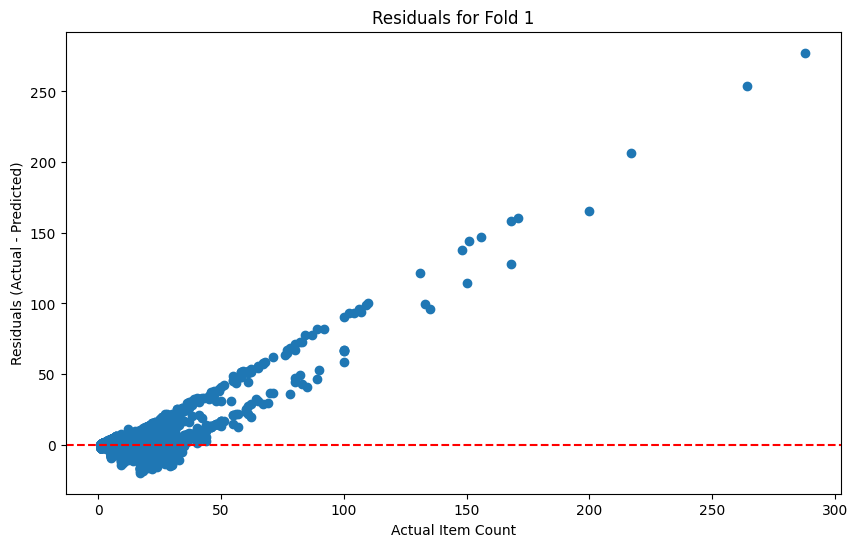

Fold 1 RMSE: 1.2378819283451554, AME: 0.051422627699374404, MPE: -0.18676676948865173, SMAPE: 1.0820721169549286


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[245]	valid_0's rmse: 0.759086


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


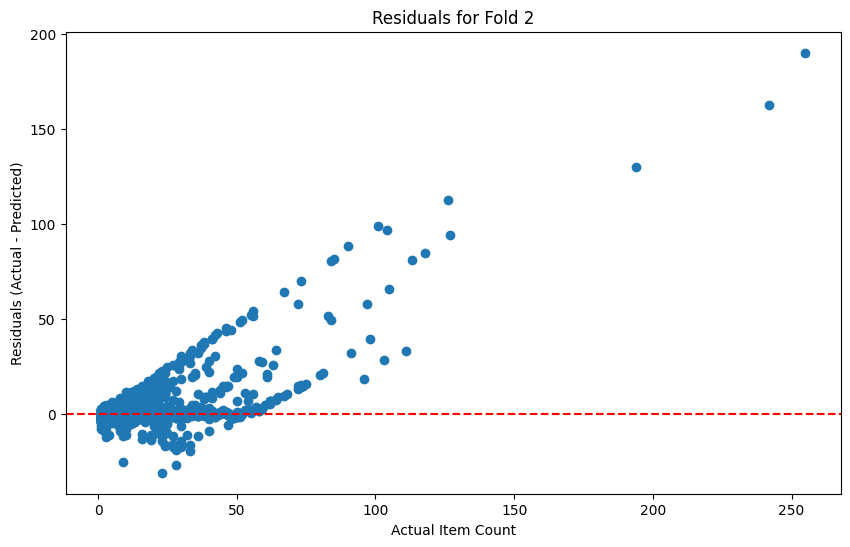

Fold 2 RMSE: 0.7590863220634272, AME: 0.040923044891818826, MPE: -0.4568738777809113, SMAPE: 1.5522167466293622


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[236]	valid_0's rmse: 1.33829


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


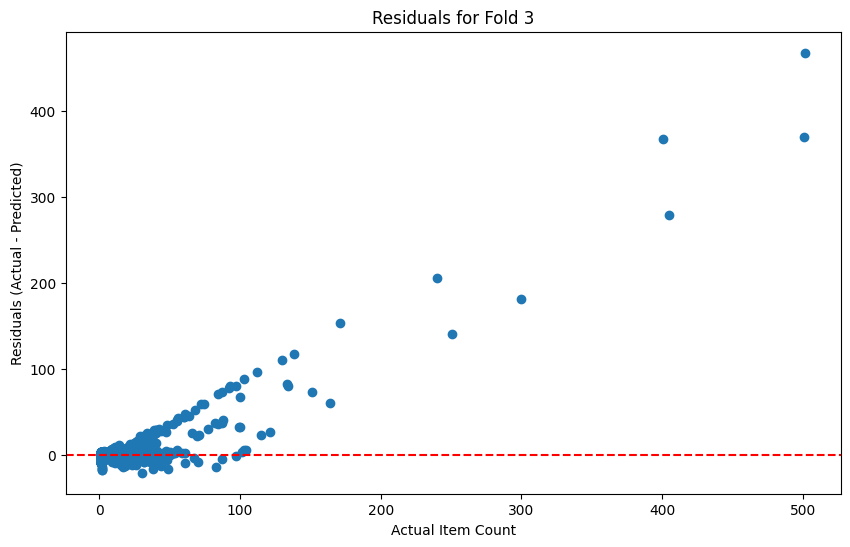

Fold 3 RMSE: 1.3382858491596705, AME: 0.040783924667996276, MPE: -0.6669052438122648, SMAPE: 1.4321612017887904


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[165]	valid_0's rmse: 1.86284


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


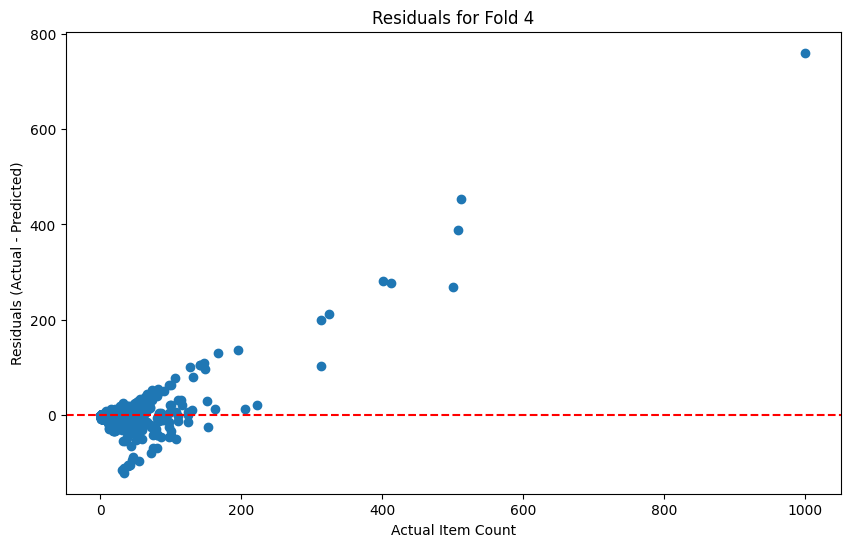

Fold 4 RMSE: 1.862837863178806, AME: 0.07189816091332556, MPE: -1.5242414282376637, SMAPE: 2.281129623414108


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[286]	valid_0's rmse: 3.49973


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


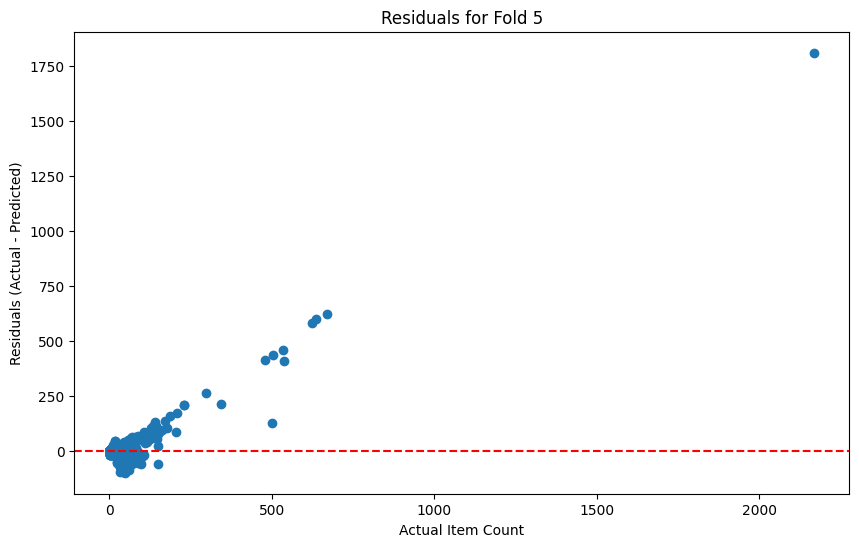

Fold 5 RMSE: 3.4997270364642303, AME: 0.07929069634523146, MPE: -0.2644900172368257, SMAPE: 1.9334997695190594
Average RMSE: 1.739563799842258
Average AME: 0.0568636909035493
Average MPE: -0.6198554673112634
Average SMAPE: 1.6562158916612497
Average MAPE: 1.849772466427681


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


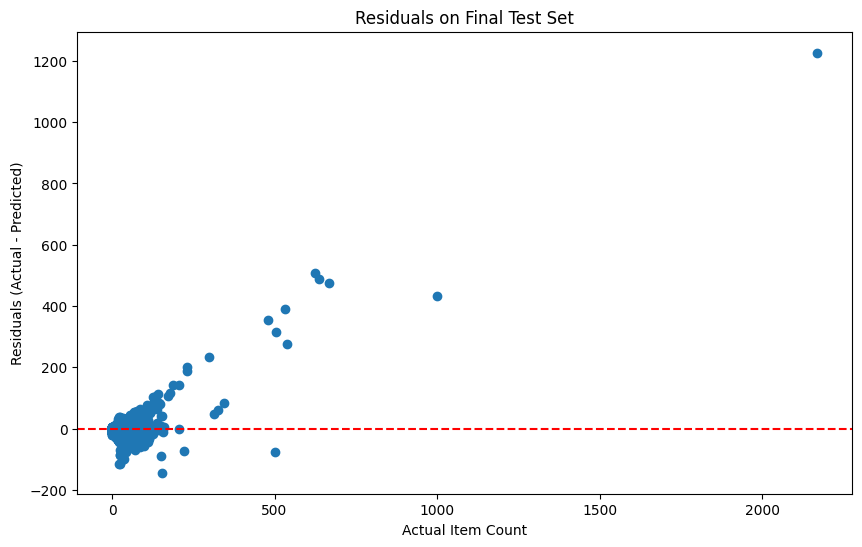

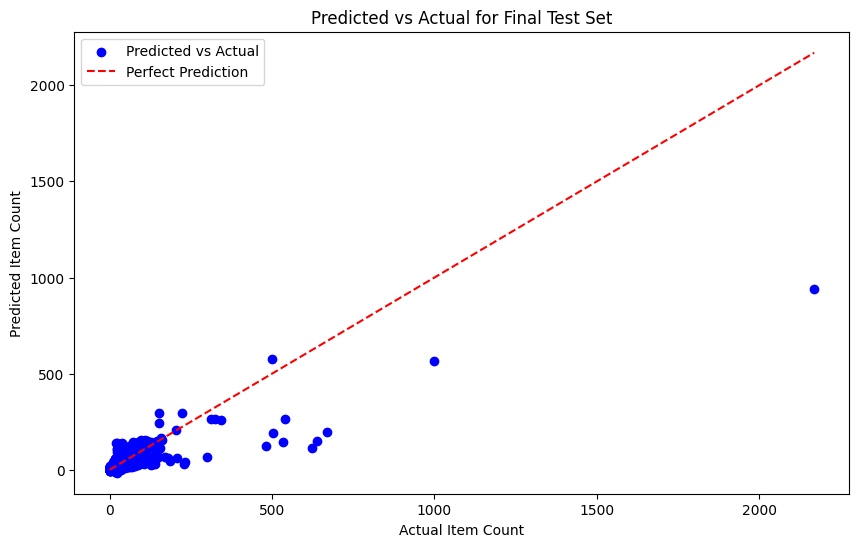

In [70]:
# Perform TimeSeriesSplit cross-validation
for fold, (train_index, test_index) in enumerate(tscv.split(X), 1):
    # Split the data into training and testing sets
    X_train, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Create LightGBM dataset
    train_set = lgb.Dataset(X_train, label=y_train)
    test_set = lgb.Dataset(X_test_fold, label=y_test_fold, reference=train_set)

    # Define LightGBM parameters
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'max_depth': best_params['max_depth'],
        'learning_rate': best_params['learning_rate'],
        'n_estimators': best_params['n_estimators'],
        'subsample': best_params['subsample'],
        'feature_fraction': 0.9,
        'verbose': -1
    }
    early_stopping = lgb.callback.early_stopping(stopping_rounds=50)

    # Train the model
    model2 = lgb.train(
        params,
        train_set,
        num_boost_round=best_params['n_estimators'],
        valid_sets=[test_set],
        callbacks=[early_stopping]
    )
    # Predict on the test fold
    y_pred_fold = model2.predict(X_test_fold, num_iteration=model2.best_iteration)

    # Calculate residuals
    residuals_fold = y_test_fold - y_pred_fold

    # Calculate and store metrics
    rmse = mean_squared_error(y_test_fold, y_pred_fold, squared=False)
    ame_score = ame(y_test_fold, y_pred_fold)
    mpe_score = mpe(y_test_fold, y_pred_fold)
    smape_score = smape(y_test_fold, y_pred_fold)
    mape_score = mape(y_test_fold, y_pred_fold)

    rmse_scores.append(rmse)
    ame_scores.append(ame_score)
    mpe_scores.append(mpe_score)
    smape_scores.append(smape_score)
    mape_scores.append(mape_score)

    # Plot Residuals for each fold
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_fold, residuals_fold)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals for Fold {fold}')
    plt.xlabel('Actual Item Count')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.show()


    print(f"Fold {fold} RMSE: {rmse}, AME: {ame_score}, MPE: {mpe_score}, SMAPE: {smape_score}")

# Average scores over all folds
average_rmse = np.mean(rmse_scores)
average_ame = np.mean(ame_scores)
average_mpe = np.mean(mpe_scores)
average_smape = np.mean(smape_scores)
average_mape = np.mean(mape_scores)

print(f"Average RMSE: {average_rmse}")
print(f"Average AME: {average_ame}")
print(f"Average MPE: {average_mpe}")
print(f"Average SMAPE: {average_smape}")
print(f"Average MAPE: {average_mape}")

# Final Model on Full Training Set and Evaluation on X_test (Final Test Set)
# Train the final model on all training data
train_set_final = lgb.Dataset(X, label=y)
final_model = lgb.train(params, train_set_final, num_boost_round=1000)

# Predict on the test set (this is the final test set you were keeping separate)
y_test_final_pred = final_model.predict(X_test, num_iteration=final_model.best_iteration)

# Calculate residuals on the final test set
residuals_final = y_test - y_test_final_pred

# Plot Residuals for the final test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_final)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals on Final Test Set')
plt.xlabel('Actual Item Count')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

# Plot Predicted vs Actual for the final test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_final_pred, label="Predicted vs Actual", color="blue")
plt.plot([0, max(y_test)], [0, max(y_test)], '--r', label="Perfect Prediction")
plt.title('Predicted vs Actual for Final Test Set')
plt.xlabel('Actual Item Count')
plt.ylabel('Predicted Item Count')
plt.legend()
plt.show()


In [71]:
# Save the model to a file in Colab
model.save_model('lightgbm_model.txt')
final_model.save_model('lightgbm_model2.txt')


**Analyse des scores obtenues:**

Moyenne des scores après la cross-validation avec les paramètres du grid search :

RMSE (Root Mean Squared Error) : 1.74
Cela indique l'écart moyen entre les valeurs réelles et les valeurs prédites, en prenant en compte les grandes erreurs. Un RMSE de 1.74 suggère que, dans l'ensemble, les prédictions sont relativement proches des valeurs réelles, mais il y a encore de la place pour l'amélioration, en particulier dans les cas de grandes ventes.

AME (Absolute Mean Error) : 0.05686
L'AME représente l'écart moyen absolu entre les valeurs réelles et les valeurs prédites, sans tenir compte de la direction de l'erreur (positive ou négative). Un AME de 0.05686 montre que le modèle fait des erreurs relativement petites dans la plupart des cas, mais il peut y avoir des erreurs plus importantes pour certaines prédictions.

MPE (Mean Percentage Error) : -0.62%
Le MPE mesure l'erreur en pourcentage. Une valeur négative suggère que, en moyenne, le modèle sous-estime les ventes. Un MPE de -0.62% montre une petite tendance à sous-estimer les ventes, ce qui peut être un point d'amélioration.

SMAPE (Symmetric Mean Absolute Percentage Error) : 1.66%
Le SMAPE est une mesure de l'erreur en pourcentage, mais qui prend en compte les erreurs absolues, et elle est symétrique. Un SMAPE de 1.66% est assez bon, indiquant que les erreurs sont globalement faibles, bien que le modèle puisse être amélioré pour les valeurs plus élevées.

MAPE (Mean Absolute Percentage Error) : 1.85%
Le MAPE mesure également l'erreur en pourcentage, et une valeur de 1.85% montre que, globalement, l'écart entre les prédictions et les valeurs réelles reste relativement faible, mais il est légèrement plus élevé que le SMAPE.

**Avant la cross-validation :** le modèle avec les paramètres par défaut présente des erreurs plus faibles, en particulier sur le SMAPE et le MAPE, indiquant que les prédictions étaient plus proches des valeurs réelles.
**Après la cross-validation avec les nouveaux paramètres**, les erreurs augmentent légèrement, notamment le SMAPE et le MAPE, ce qui suggère que bien que la cross-validation permette de mieux ajuster le modèle aux données, cela n'a pas toujours amélioré les performances globales. Il est possible que le modèle ajusté ait commencé à s'adapter trop fortement à certaines spécificités du jeu de données, ce qui peut entraîner un léger surajustement (overfitting).

**Conclusion :** Le modèle avec les paramètres par défaut semble avoir eu un meilleur compromis entre la précision et la généralisation avant la cross-validation.